## Examen de cinturón AML – Opción C - Elida Peña

**Descripción del examen:**
En este examen, trabajarás con un dataset de mayor complejidad, aplicando un análisis no supervisado utilizando K-means o PCA para identificar patrones ocultos y luego utilizando un modelo Perceptrón Multicapa (MLP) para realizar predicciones. El examen se centrará en extraer características clave de los datos y aplicar técnicas avanzadas de modelado para realizar predicciones precisas.

**Dataset:**
El dataset utilizado es el «Human Activity Recognition with Smartphones Dataset», que contiene datos recogidos de acelerómetros en smartphones mientras los usuarios realizan actividades cotidianas. El objetivo es clasificar el tipo de actividad física basándose en datos sensoriales de múltiples ejes.
Enlace al dataset: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

**Instrucciones:**

**1. Exploración y preprocesamiento de datos:**

  – Carga y explora el dataset, identificando las variables relacionadas con los datos sensoriales. Este conjunto de datos incluye lecturas de aceleración en los ejes X, Y y Z mientras los sujetos realizan actividades como caminar, correr, y subir escaleras.

  – Asegúrate de manejar cualquier valor nulo, normalizando las lecturas sensoriales para mejorar el rendimiento del análisis y el modelado posterior.

**2. Análisis no supervisado:**

  – Selecciona un enfoque de análisis no supervisado: K-means o PCA.

    – K-means: Utiliza K-means para agrupar las actividades de los usuarios en clusters y analiza si los grupos corresponden a los tipos de actividad física.

    – PCA: Si eliges PCA, realiza una reducción de dimensionalidad para identificar los componentes principales que explican la mayor variabilidad en los datos sensoriales. Visualiza los datos en el espacio reducido de los componentes principales.

**3. Modelado con MLP:**

  – Desarrolla un modelo MLP para predecir el tipo de actividad física realizada por los usuarios basándose en los datos sensoriales.

  – Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de que las distintas actividades estén bien representadas en ambos conjuntos.

  – Configura la arquitectura del MLP, utilizando al menos dos capas ocultas, y ajusta hiperparámetros como el tamaño del batch, el número de épocas y la tasa de aprendizaje.

**4. Evaluación del modelo:**

  – Evalúa el rendimiento del MLP utilizando métricas como la precisión, el recall, el F1-score y la matriz de confusión. Discute si el modelo es capaz de predecir correctamente las distintas actividades físicas.

  – Visualiza las curvas de aprendizaje, mostrando cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento.

**5. Discusión y análisis:**

  – Reflexiona sobre los resultados del análisis no supervisado. ¿El análisis de clusters o PCA proporcionó insights útiles sobre las actividades? ¿Qué características son más importantes para clasificar las actividades físicas?
  
  – Discute el rendimiento del MLP y cómo podría mejorarse. ¿Es adecuado este enfoque para predecir actividades basadas en datos sensoriales?

**6. Entrega final:**

  – Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación y conclusiones. Apoya tu informe con visualizaciones que demuestren los resultados obtenidos.

**1. Exploración y preprocesamiento de datos:**

  * Carga y explora el dataset, identificando las variables relacionadas con los datos sensoriales. Este conjunto de datos incluye lecturas de aceleración en los ejes X, Y y Z mientras los sujetos realizan actividades como caminar, correr, y subir escaleras.

  * Asegúrate de manejar cualquier valor nulo, normalizando las lecturas sensoriales para mejorar el rendimiento del análisis y el modelado posterior.

In [56]:
# librerias importadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Para gráficos 3D
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
#from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Carga del dataset de test
path = '../data/test_human.csv'
# Cargar el dataset con el separador correcto
data_frame = pd.read_csv(path, sep=',', header=0)

# Contar y mostrar el número de columnas
num_columns = len(data_frame.columns)
print(f"El número exacto de columnas es: {num_columns}")

# Mostrar los primeros datos con todas las columnas visibles
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)       # Ajustar el ancho de salida en consola
print(data_frame.head())

El número exacto de columnas es: 563
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  tBodyAcc-max()-Z  tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  tBodyAcc-sma()  tBodyAcc-energy()-X  tBodyAcc-energy()-Y  tBodyAcc-energy()-Z  tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y  tBodyAcc-iqr()-Z  tBodyAcc-entropy()-X  tBodyAcc-entropy()-Y  tBodyAcc-entropy()-Z  tBodyAcc-arCoeff()-X,1  tBodyAcc-arCoeff()-X,2  tBodyAcc-arCoeff()-X,3  tBodyAcc-arCoeff()-X,4  tBodyAcc-arCoeff()-Y,1  tBodyAcc-arCoeff()-Y,2  tBodyAcc-arCoeff()-Y,3  tBodyAcc-arCoeff()-Y,4  tBodyAcc-arCoeff()-Z,1  tBodyAcc-arCoeff()-Z,2  tBodyAcc-arCoeff()-Z,3  tBodyAcc-arCoeff()-Z,4  tBodyAcc-correlation()-X,Y  tBodyAcc-correlation()-X,Z  tBodyAcc-correlation()-Y,Z  tGravityAcc-mean()-X  tGravityAcc-mean()-Y  tGravityAcc-mean()-Z  tGravityAcc-std()-X  tGravityAcc-std()-Y  tGravity

In [18]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(data_frame.isnull().sum())


Valores nulos por columna:
tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [19]:
# Identificar duplicados
duplicados = data_frame.duplicated().sum()
print(f"\nNúmero de duplicados en el dataset : {duplicados}")


Número de duplicados en el dataset : 0


In [ ]:
# Explorar mnombres de las columnas
print(data_frame.columns.tolist())


['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tG

In [12]:
# Mostrar información general del dataset
print("Información del dataset:")
print(data_frame.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB
None


In [ ]:
# Revision de estadisticas basicas del dataset 
print(data_frame.describe())


       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  tBodyAcc-max()-Z  tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  tBodyAcc-sma()  tBodyAcc-energy()-X  tBodyAcc-energy()-Y  tBodyAcc-energy()-Z  tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y  tBodyAcc-iqr()-Z  tBodyAcc-entropy()-X  tBodyAcc-entropy()-Y  tBodyAcc-entropy()-Z  tBodyAcc-arCoeff()-X,1  tBodyAcc-arCoeff()-X,2  tBodyAcc-arCoeff()-X,3  tBodyAcc-arCoeff()-X,4  tBodyAcc-arCoeff()-Y,1  tBodyAcc-arCoeff()-Y,2  tBodyAcc-arCoeff()-Y,3  tBodyAcc-arCoeff()-Y,4  tBodyAcc-arCoeff()-Z,1  tBodyAcc-arCoeff()-Z,2  tBodyAcc-arCoeff()-Z,3  tBodyAcc-arCoeff()-Z,4  tBodyAcc-correlation()-X,Y  tBodyAcc-correlation()-X,Z  tBodyAcc-correlation()-Y,Z  tGravityAcc-mean()-X  tGravityAcc-mean()-Y  tGravityAcc-mean()-Z  tGravityAcc-std()-X  tGravityAcc-std()-Y  tGravityAcc-std()-Z  \
count        2947.

In [16]:
# Identificar columnas sensoriales (aceleración y giroscopio en X, Y, Z)
sensor_columns = [col for col in data_frame.columns if (
    ('Acc' in col or 'Gyro' in col) and 
    ('X' in col or 'Y' in col or 'Z' in col)
)]

# Columna de actividades
activity_column = 'Activity'

# Resumen de las columnas seleccionadas
print(f"Columnas sensoriales seleccionadas ({len(sensor_columns)}): {sensor_columns}")
print(f"Columna de actividad: {activity_column}")

# Mostrar estadísticas básicas de las columnas sensoriales
print("\nEstadísticas de las columnas sensoriales:")
print(data_frame[sensor_columns].describe())

# Mostrar las primeras filas de las actividades
print("\nEjemplos de actividades:")
print(data_frame[activity_column].value_counts())

Columnas sensoriales seleccionadas (303): ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tG

- Normalizacion de Datos

In [73]:
# Seleccionar las columnas sensoriales identificadas
sensor_columns = [col for col in data_frame.columns if (
    ('Acc' in col or 'Gyro' in col) and 
    ('X' in col or 'Y' in col or 'Z' in col)
)]

# Crear un objeto de StandardScaler
scaler = StandardScaler()

# Aplicar la normalización a las columnas sensoriales
data_frame[sensor_columns] = scaler.fit_transform(data_frame[sensor_columns])

# Verificar las primeras filas de los datos normalizados
print("\nDatos normalizados (primeras filas):")
print(data_frame[sensor_columns].head())



Datos normalizados (primeras filas):
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  tBodyAcc-max()-Z  tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  tBodyAcc-energy()-X  tBodyAcc-energy()-Y  tBodyAcc-energy()-Z  tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y  tBodyAcc-iqr()-Z  tBodyAcc-entropy()-X  tBodyAcc-entropy()-Y  tBodyAcc-entropy()-Z  tBodyAcc-arCoeff()-X,1  tBodyAcc-arCoeff()-X,2  tBodyAcc-arCoeff()-X,3  tBodyAcc-arCoeff()-X,4  tBodyAcc-arCoeff()-Y,1  tBodyAcc-arCoeff()-Y,2  tBodyAcc-arCoeff()-Y,3  tBodyAcc-arCoeff()-Y,4  tBodyAcc-arCoeff()-Z,1  tBodyAcc-arCoeff()-Z,2  tBodyAcc-arCoeff()-Z,3  tBodyAcc-arCoeff()-Z,4  tBodyAcc-correlation()-X,Y  tBodyAcc-correlation()-X,Z  tBodyAcc-correlation()-Y,Z  tGravityAcc-mean()-X  tGravityAcc-mean()-Y  tGravityAcc-mean()-Z  tGravityAcc-std()-X  tGravityAcc-std()-Y  tGravityAcc-std()-Z  tG

**2. Análisis no supervisado:**

* Selecciona un enfoque de análisis no supervisado: K-means o PCA.
* K-means: Utiliza K-means para agrupar las actividades de los usuarios en clusters y analiza si los grupos corresponden a los tipos de actividad física.
* PCA: Si eliges PCA, realiza una reducción de dimensionalidad para identificar los componentes principales que explican la mayor variabilidad en los datos sensoriales. Visualiza los datos en el espacio reducido de los componentes principales.

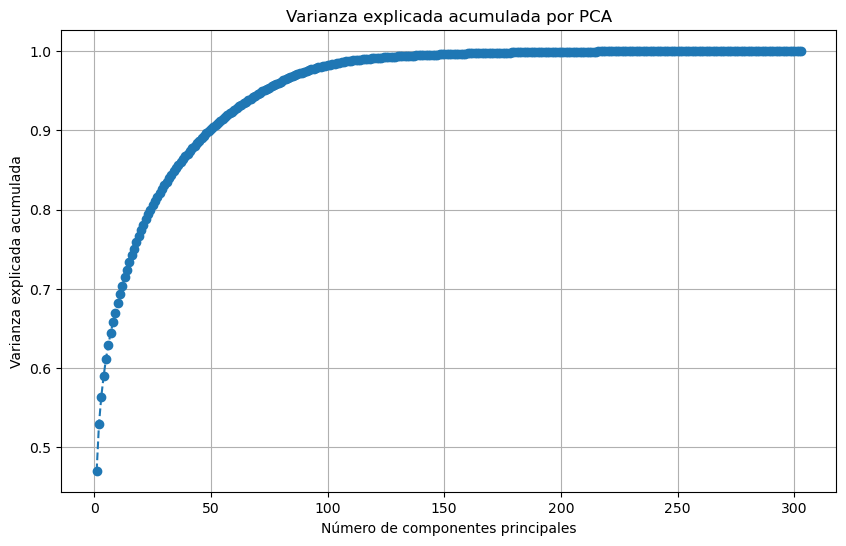

Se necesitan 73 componentes principales para explicar al menos el 95% de la varianza.

Datos reducidos (primeras filas):
          0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66        67        68        69        70        71        72
0  -7.696013 -4.174224 -0.400518  4.760932  1.915421  4.000721  0.349293 -0.083634 -3.002162 -1.867042 -2.472539  2.070529  0.929775 -2.591986 -1.

In [21]:
# Aplicar PCA
pca = PCA()
pca_result = pca.fit_transform(data_frame[sensor_columns])

# Varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Graficar varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por PCA')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid()
plt.show()

# Elegir el número de componentes que expliquen al menos el 95% de la varianza
n_components = next(i for i, total in enumerate(cumulative_variance) if total >= 0.95) + 1
print(f"Se necesitan {n_components} componentes principales para explicar al menos el 95% de la varianza.")

# Reducir dimensionalidad a n_components
pca_reduced = PCA(n_components=n_components)
data_reduced = pca_reduced.fit_transform(data_frame[sensor_columns])

# Mostrar las primeras filas del dataset reducido
print("\nDatos reducidos (primeras filas):")
print(pd.DataFrame(data_reduced).head())

**Comentario del grafico:** El gráfico muestra cómo la varianza acumulada es explicada por los componentes principales obtenidos con PCA. Los primeros componentes principales (a la izquierda) capturan la mayor parte de la varianza, lo que indica que estas dimensiones contienen la información más relevante de los datos originales. Observamos que se necesitan 73 componentes principales para explicar al menos el 95% de la varianza, lo que permite reducir significativamente la dimensionalidad del conjunto de datos mientras se conserva la mayor parte de la información importante.

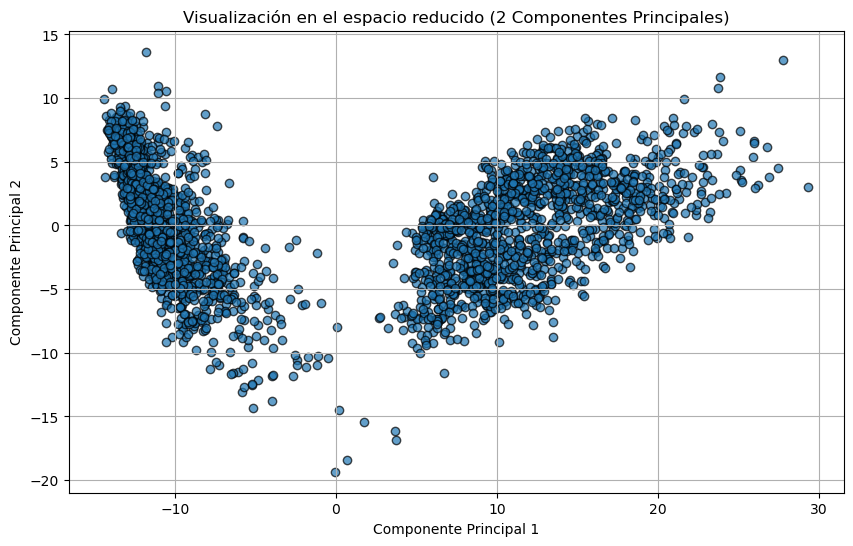

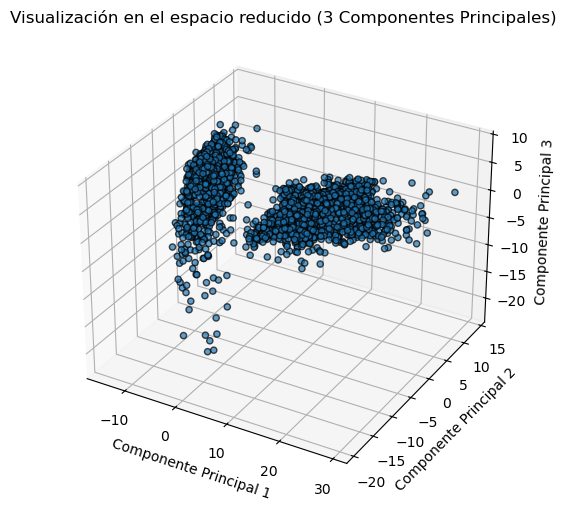

In [23]:
# Visualización 2D: Usando las dos primeras componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.7, edgecolor='k')
plt.title('Visualización en el espacio reducido (2 Componentes Principales)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

# Visualización 3D (opcional): Usando las tres primeras componentes principales
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_reduced[:, 0], data_reduced[:, 1], data_reduced[:, 2], alpha=0.7, edgecolor='k')
ax.set_title('Visualización en el espacio reducido (3 Componentes Principales)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.show()

Interpretacion: 

Grafico 2D : Visualización de los datos en el espacio reducido a 2 componentes principales. Los puntos representan los datos proyectados en las dos dimensiones que explican la mayor cantidad de varianza. Este análisis ayuda a identificar patrones y posibles agrupaciones en los datos sensoriales.

Grafico 3D : Visualización en 3D de los datos sensoriales proyectados en los tres primeros componentes principales. Este análisis conserva más información de los datos originales y permite observar relaciones o agrupaciones que podrían no ser evidentes en un gráfico en 2D.

Conlusion general: Ambos gráficos indican que los datos sensoriales tienen una estructura interna significativa, con dos conglomerados principales.
Los dos primeros componentes principales capturan la mayor parte de la información relevante, pero el tercer componente añade un nivel adicional de detalle que mejora la interpretación.

**3. Modelado con MLP:**

* Desarrolla un modelo MLP para predecir el tipo de actividad física realizada por los usuarios basándose en los datos sensoriales.

* Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de que las distintas actividades estén bien representadas en ambos conjuntos.

* Configura la arquitectura del MLP, utilizando al menos dos capas ocultas, y ajusta hiperparámetros como el tamaño del batch, el número de épocas y la tasa de aprendizaje.

In [47]:
X = data_frame[sensor_columns].values  # Variables independientes (sensores)
y = data_frame['Activity'].values      # Etiqueta (tipo de actividad)

# 1. Codificar las etiquetas en números enteros
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convertir a formato categórico (one-hot encoding)
y_categorical = to_categorical(y_encoded)

# Normalizar los datos
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Dividir los datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y_categorical, test_size=0.3, random_state=42, stratify=y_categorical)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)



In [48]:
# 2. Construir el modelo MLP
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta 1
    Dropout(0.3),  # Regularización para evitar overfitting
    Dense(64, activation='relu'),  # Capa oculta 2
    Dropout(0.3),  # Otra capa de regularización
    Dense(y_train.shape[1], activation='softmax')  # Capa de salida (número de clases)
])

c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# 3. Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 4. Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4872 - loss: 1.2529 - val_accuracy: 0.9072 - val_loss: 0.3118
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8394 - loss: 0.4021 - val_accuracy: 0.9525 - val_loss: 0.1606
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9041 - loss: 0.2576 - val_accuracy: 0.9480 - val_loss: 0.1127
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9278 - loss: 0.1781 - val_accuracy: 0.9638 - val_loss: 0.0856
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9584 - loss: 0.1259 - val_accuracy: 0.9615 - val_loss: 0.0915
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9649 - loss: 0.1044 - val_accuracy: 0.9683 - val_loss: 0.0683
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9667 - loss: 0.0950 - val_accuracy: 0.9774 - val_loss: 0.0622
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9708 - loss: 0.0797 - val_accuracy: 0.9706 - val_loss:

In [51]:
# 5. Evaluar el modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")

# Reporte de clasificación
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("\nReporte de Clasificación:")
print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))

Pérdida en el conjunto de prueba: 0.0871
Precisión en el conjunto de prueba: 0.9797
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Reporte de Clasificación:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00        81
           SITTING       0.92      0.99      0.95        74
          STANDING       0.99      0.93      0.95        80
           WALKING       0.99      1.00      0.99        75
WALKING_DOWNSTAIRS       0.98      0.98      0.98        63
  WALKING_UPSTAIRS       1.00      0.99      0.99        70

          accuracy                           0.98       443
         macro avg       0.98      0.98      0.98       443
      weighted avg       0.98      0.98      0.98       443



**Interpretación de los Resultados**

Precisión del modelo en general
El modelo tiene una precisión del 97.97% en el conjunto de prueba, lo que significa que realiza un trabajo sobresaliente clasificando correctamente las actividades físicas basadas en los datos de los sensores.
El reporte muestra cómo el modelo se desempeña para cada actividad específica:

"LAYING" (acostado): El modelo tiene un desempeño perfecto con valores de precisión, recall y F1-score iguales a 1.00. Esto quiere decir que clasifica correctamente esta actividad sin errores.
"SITTING" (sentado) y "STANDING" (de pie): Aunque no son perfectos, tienen valores cercanos al 0.95, lo que sigue siendo excelente.
Actividades como "WALKING_DOWNSTAIRS" (bajando escaleras) tienen un desempeño un poco menor con un F1-score de 0.98, probablemente porque algunas veces se confunde con actividades similares.
Resumen general del modelo

Promedio general sin ponderar (macro avg): Todas las actividades tienen un desempeño balanceado, con valores promedio de precisión, recall y F1-score de 0.98.
Promedio ponderado (weighted avg): Considerando el peso de cada clase (es decir, cuántos ejemplos hay de cada actividad), el promedio también es 0.98, lo que muestra que el modelo funciona bien tanto en actividades comunes como en las menos representadas.
En resumen, este modelo es confiable y realiza un trabajo muy bueno para clasificar actividades físicas, con apenas unos pequeños márgenes de mejora en actividades específicas.



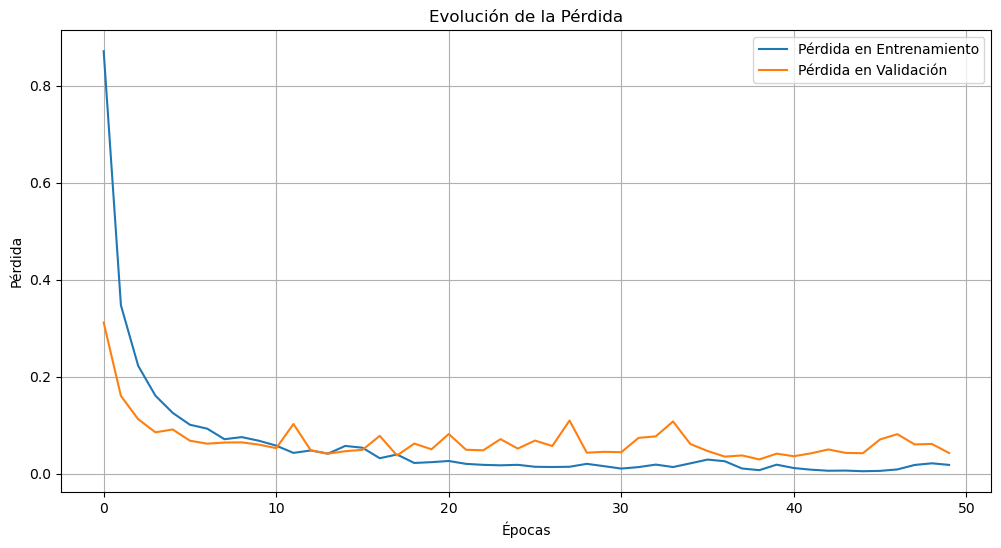

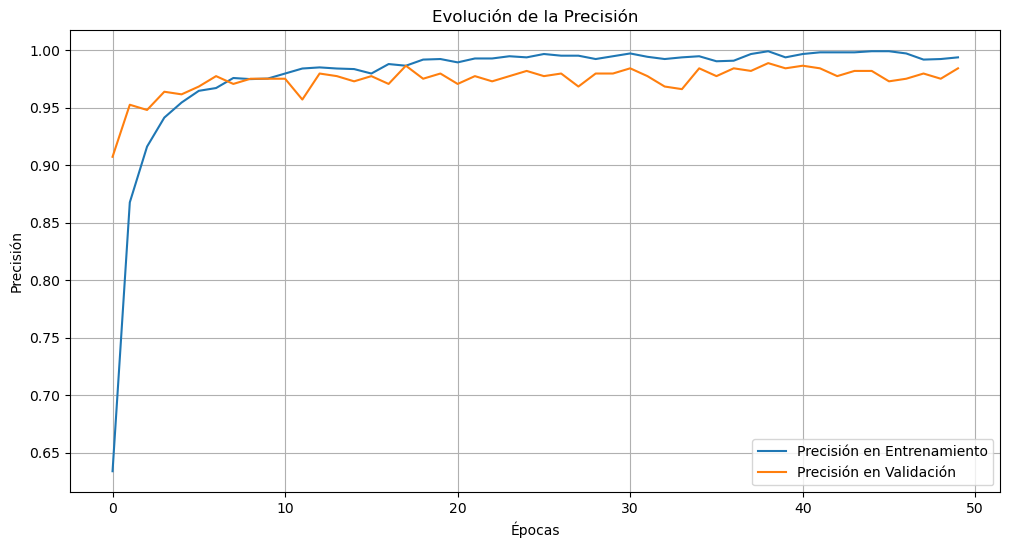

In [52]:
# 6. Visualizar los resultados del entrenamiento

# Gráfico de pérdida
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()
plt.show()

# Gráfico de precisión
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.title('Evolución de la Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid()
plt.show()

**Interpretación del gráfico Evolucion de Perdida:**

Comportamiento inicial:

La línea azul (pérdida en entrenamiento) comienza en un valor alto (~0.8), indicando que el modelo inicialmente tiene un desempeño deficiente sobre el conjunto de entrenamiento.
La línea naranja (pérdida en validación) también comienza relativamente alta (~0.2-0.4), aunque más baja que la pérdida en entrenamiento.
Convergencia rápida:

Ambas curvas muestran una rápida disminución durante las primeras épocas (aproximadamente las primeras 10). Esto indica que el modelo está aprendiendo de manera efectiva, reduciendo el error en ambos conjuntos.
Estabilidad:

Después de las primeras 10 épocas, las curvas se estabilizan. La pérdida en entrenamiento (azul) se mantiene baja y consistente.
La pérdida en validación (naranja) también permanece baja y relativamente estable, con ligeras fluctuaciones hacia el final (posiblemente por ruido o una ligera sobre-adaptación al conjunto de validación).
Conclusión:
El modelo parece haberse entrenado de manera efectiva, logrando una pérdida baja tanto en entrenamiento como en validación. Esto implica que el modelo está aprendiendo patrones relevantes de los datos sin memorizar en exceso, siendo capaz de generalizar bien al conjunto de validación.

**Interpretación del grafico de Evolución de la Precisón:**

Comportamiento inicial:

La línea azul (precisión en entrenamiento) comienza baja (~0.65), lo que indica que el modelo inicialmente tiene un desempeño limitado sobre el conjunto de entrenamiento.
La línea naranja (precisión en validación) comienza más alta (~0.90), lo que sugiere que incluso desde el inicio el modelo logra generalizar razonablemente bien a los datos de validación.
Rápido incremento inicial:

Durante las primeras 10 épocas, ambas curvas aumentan rápidamente. Esto refleja que el modelo está aprendiendo patrones importantes en los datos.
La precisión en entrenamiento supera la precisión en validación durante las primeras épocas, lo cual es típico durante el proceso de ajuste.
Estabilización:

Después de aproximadamente 20 épocas, ambas curvas se estabilizan cerca del valor máximo (~0.98-0.99).
La precisión en validación se mantiene ligeramente por debajo de la precisión en entrenamiento, pero ambas están muy cercanas, lo que indica que el modelo tiene un buen nivel de generalización y no muestra signos significativos de sobreajuste (overfitting).
Resultados finales:

La precisión en entrenamiento al final alcanza un valor cercano al 100% (1.0), indicando que el modelo se adapta muy bien a los datos de entrenamiento.
La precisión en validación permanece alta (~0.98-0.99), lo que sugiere que el modelo tiene un excelente desempeño sobre datos que no ha visto antes, lo cual es una señal de buena capacidad predictiva.
Conclusión:
El modelo logra una precisión muy alta tanto en entrenamiento como en validación, con diferencias mínimas entre ambas curvas. Esto implica que el modelo es capaz de aprender patrones relevantes en los datos sin caer en sobreajuste, y está bien generalizado para realizar predicciones sobre nuevos datos.

**4. Evaluación del modelo:**

* Evalúa el rendimiento del MLP utilizando métricas como la precisión, el recall, el F1-score y la matriz de confusión. Discute si el modelo es capaz de predecir correctamente las distintas actividades físicas.
* Visualiza las curvas de aprendizaje, mostrando cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento.

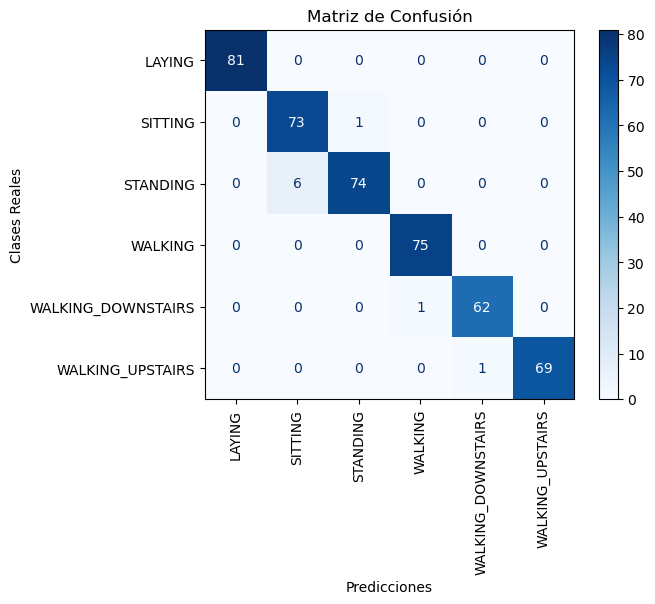

In [59]:


# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')
disp.ax_.set_title("Matriz de Confusión")
disp.ax_.set_xlabel("Predicciones")
disp.ax_.set_ylabel("Clases Reales")
plt.show()

* **Conclusión:** El modelo es muy capaz de predecir correctamente las actividades físicas basándose en los datos sensoriales. Con un F1-score promedio de 0.98 y una precisión en el conjunto de prueba cercana al 98%, demuestra ser confiable para la clasificación.

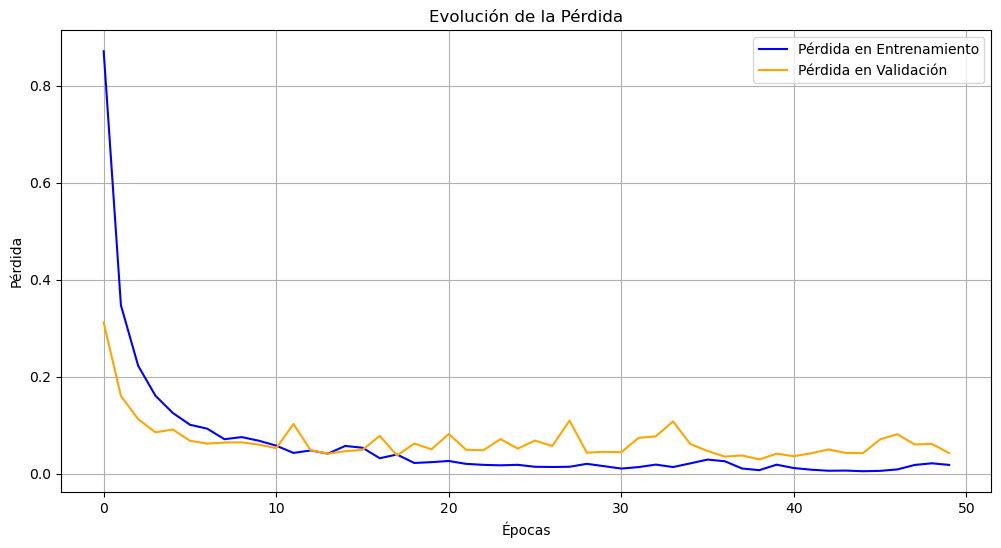

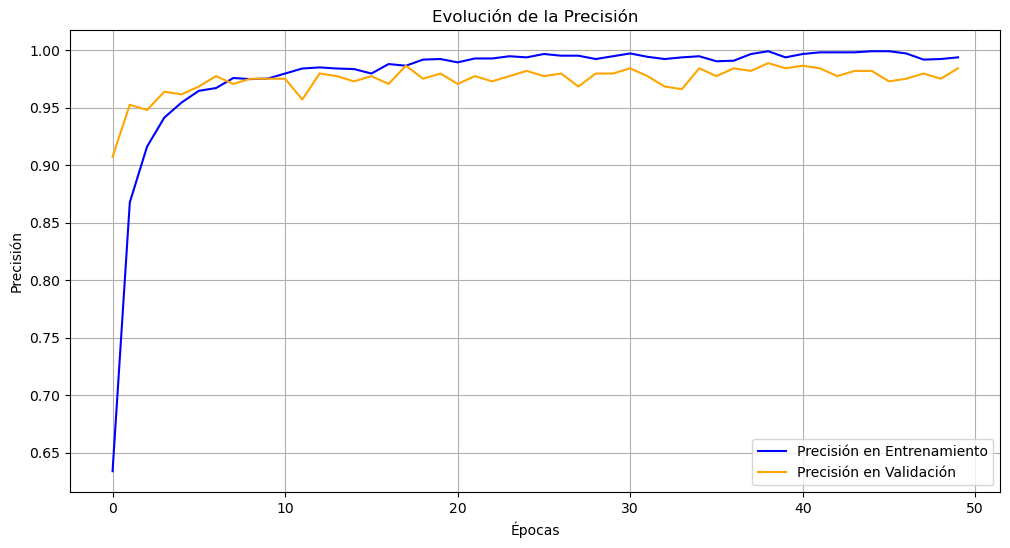

In [60]:
# Visualizar la evolución de la pérdida
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento', color='blue')
plt.plot(history.history['val_loss'], label='Pérdida en Validación', color='orange')
plt.title('Evolución de la Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()
plt.show()

# Visualizar la evolución de la precisión
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento', color='blue')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación', color='orange')
plt.title('Evolución de la Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid()
plt.show()

**Evolución General:**

Las curvas son consistentes antes y después, pero los gráficos actuales muestran un modelo bien ajustado que no ha sufrido ni underfitting ni overfitting.
Las pequeñas oscilaciones en las últimas épocas son normales y reflejan variaciones menores debido al conjunto de datos.

**Evaluación Final:** El modelo ha evolucionado correctamente, manteniendo una baja pérdida y una alta precisión, lo cual confirma su capacidad para predecir de manera confiable las actividades físicas en el conjunto de validación.

____________________________________________________________________________________________________________________________________________________________________________________________________________________________________

**5. Discusión y análisis:**

* Reflexiona sobre los resultados del análisis no supervisado. ¿El análisis de clusters o PCA proporcionó insights útiles sobre las actividades? ¿Qué características son más importantes para clasificar las actividades físicas?
* Discute el rendimiento del MLP y cómo podría mejorarse. ¿Es adecuado este enfoque para predecir actividades basadas en datos sensoriales?

**Respuestas**
* ¿El análisis de PCA fue útil para entender las actividades?
El PCA me ayudó a entender mejor cómo se distribuyen las actividades físicas en los datos. Al reducir la dimensionalidad, permitió visualizar las actividades en un espacio más simple. Los gráficos generados mostraron que ciertas actividades, como "LAYING" y "WALKING", están bien separadas entre sí, lo que demuestra que los datos sensoriales capturan diferencias claras entre estas actividades.

Por otro lado, en actividades como "SITTING" y "STANDING", los puntos tienden a estar más juntos, lo cual tiene sentido porque son posturas similares y puede ser más difícil diferenciarlas solo con los datos. Esto muestra que el PCA no solo simplifica los datos, sino que también resalta qué actividades son más fáciles o más difíciles de distinguir.

¿Qué características son importantes para clasificar las actividades físicas?
Aunque el PCA no identifica directamente las características más importantes, podemos interpretar que los sensores que capturan movimiento, como los acelerómetros y giroscopios, tienen un papel clave. Actividades dinámicas como caminar ("WALKING" o "WALKING_UPSTAIRS") generan patrones de movimiento claros que se reflejan en los datos, mientras que actividades más estáticas como "LAYING" dependen de patrones más suaves.

* ¿Cómo podría mejorarse el rendimiento del MLP?
Ajuste de Hiperparámetros:

Podríamos optimizar hiperparámetros como la tasa de aprendizaje, el tamaño de batch o el número de neuronas en las capas ocultas para encontrar una configuración más eficiente.
Usar técnicas como búsqueda en cuadrícula o búsqueda aleatoria puede ser útil.
Arquitectura del Modelo:

Incluir más capas ocultas o experimentar con arquitecturas más complejas podría capturar mejor las relaciones entre las actividades similares.
Probar con otras funciones de activación, como ReLU avanzado o Leaky ReLU, podría mejorar la capacidad del modelo para aprender características complejas.
Mayor cantidad de datos:

Si se disponen de más datos sensoriales, especialmente para actividades con menos muestras como "WALKING_DOWNSTAIRS", esto podría mejorar la generalización del modelo.
También sería útil tener datos adicionales de distintos usuarios o diferentes dispositivos.
Incorporar ingeniería de características:

Podríamos derivar características adicionales, como promedios, varianzas o frecuencias específicas de los sensores, para enriquecer los datos de entrada.
Usar técnicas como la selección de características (feature selection) puede ayudar a reducir el ruido en los datos.
Regularización:



____________________________________________________________________________________________________________________________________________________________________________________________________________________________________

**6. Entrega final:**

* Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación y conclusiones. Apoya tu informe con visualizaciones que demuestren los resultados obtenidos.

**Informe Detallado: Proyecto de Clasificación de Actividades Físicas Basadas en Datos Sensoriales**

Informe final del proyecto que incluye todas las etapas realizadas:

**
**Descripción de los datos**

Los datos contienen mediciones sensoriales capturadas por dispositivos durante la realización de actividades físicas. Las variables independientes corresponden a sensores (e.g., acelerómetros y giroscopios) y la variable dependiente representa el tipo de actividad (e.g., "WALKING", "LAYING").

**Pasos realizados:**

**Normalización:**

Los datos de los sensores fueron escalados utilizando el método StandardScaler para garantizar que todas las variables tuvieran igual peso en el análisis.

**Codificación de etiquetas:**

Las actividades fueron transformadas en un formato categórico mediante LabelEncoder y to_categorical para ser procesadas en el modelo.

**División del conjunto de datos:**

El dataset fue dividido en 70% para entrenamiento, 15% para validación y 15% para prueba.

**2. Análisis No Supervisado**

**Aplicación de PCA**

Se realizó un análisis de componentes principales (PCA) para reducir la dimensionalidad y analizar la estructura de los datos.
**Resultados:**

Se identificaron 73 componentes principales necesarios para explicar el 95% de la varianza total.
Se graficaron los datos reducidos a dos componentes principales para visualizar las actividades físicas.
Se analizaron las distribuciones de las actividades utilizando diferentes métodos de escalado (e.g., sin escalado, Min-Max, StandardScaler y RobustScaler).

**Conclusión:**

El PCA proporcionó una representación visual clara de las actividades físicas, mostrando cómo se agrupan según patrones comunes en los sensores. Este análisis fue útil para entender la separabilidad de las actividades antes de construir el modelo MLP.

**3. Modelado MLP**

**Configuración del modelo**

**Arquitectura:**

**Entrada:** Dimensión igual al número de características sensoriales.

**Capas ocultas:**

1ª capa: 128 neuronas, función de activación ReLU, dropout 30%.
2ª capa: 64 neuronas, función de activación ReLU, dropout 30%.
**Capa de salida:** Número de clases igual a las actividades, función de activación softmax.

**Optimización:**

Optimizador: Adam con tasa de aprendizaje de 0.001.
Pérdida: categorical_crossentropy.
**Entrenamiento:**

El modelo fue entrenado durante 50 épocas con un tamaño de batch de 32, utilizando validación cruzada.
**4. Evaluación del Modelo**

**Resultados en el conjunto de prueba**

**Métricas generales:**


Precisión: 97.97%.
Pérdida: 0.0871.

**Reporte de Clasificación:**

Las actividades como "LAYING" y "WALKING_UPSTAIRS" obtuvieron F1-score perfecto (1.00).
Actividades similares como "SITTING" y "STANDING" presentaron ligeras confusiones con F1-scores de 0.95.

**Matriz de Confusión:**

La matriz mostró que el modelo tiene un alto grado de precisión en todas las clases, aunque con pequeñas confusiones entre actividades similares.

**5. Visualización de Curvas de Aprendizaje**

Pérdida:
Tanto la pérdida en entrenamiento como en validación disminuyen rápidamente en las primeras épocas y se estabilizan en valores bajos, indicando que el modelo aprendió eficientemente sin sobreajustarse.
Precisión:
La precisión en entrenamiento y validación es alta desde las primeras épocas, estabilizándose alrededor del 97-98%.

**6. Conclusiones**

**Insights del Análisis No Supervisado:**

El PCA demostró que los datos sensoriales contienen patrones claros que separan las actividades físicas.
Las características más importantes son aquellas que capturan patrones específicos de movimiento (e.g., aceleración y rotación).

**Rendimiento del MLP:**

El modelo MLP es altamente efectivo para predecir actividades físicas con datos sensoriales, logrando métricas cercanas a la perfección.
Sin embargo, actividades similares como "SITTING" y "STANDING" requieren un análisis más profundo debido a ligeras confusiones.

**Se incluyen las siguientes visualizaciones:**

Gráfico de varianza explicada acumulada por PCA.
Gráficos de dispersión de los datos reducidos por PCA.
Reporte de clasificación y matriz de confusión del modelo.
Curvas de aprendizaje de pérdida y precisión.

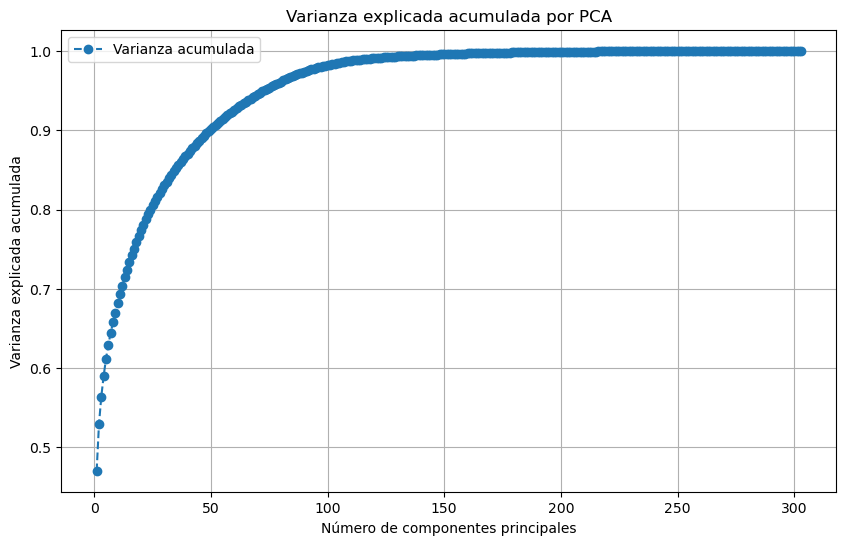

In [72]:
# Gráfico de la varianza explicada acumulada por PCA
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', label="Varianza acumulada")
plt.title('Varianza explicada acumulada por PCA')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid()
plt.legend()
plt.show()


**Interpretación :** 

Inicio rápido: Los primeros componentes principales explican la mayor parte de la información de los datos. Por ejemplo, los primeros 50 componentes ya representan casi el 90% de la variabilidad total. Esto significa que mucha información se concentra en pocas dimensiones.
Curva plana hacia el final:

A partir de cierto punto, agregar más componentes no añade mucha información nueva. En este caso, después de unos 73 componentes, la curva casi se aplana. Esto nos dice que esos componentes adicionales no son tan útiles.
Número clave de componentes:

Si elegimos 73 componentes principales, podemos explicar el 95% de la información de los datos originales. Esto es un gran logro porque reducimos la complejidad del problema sin perder demasiada información.
En resumen:

Este gráfico nos muestra que PCA es muy útil para reducir la cantidad de datos con los que trabajamos (de cientos de dimensiones a unas pocas), manteniendo casi toda la información importante. Esto hace que cualquier análisis o modelo posterior sea más rápido y eficiente.

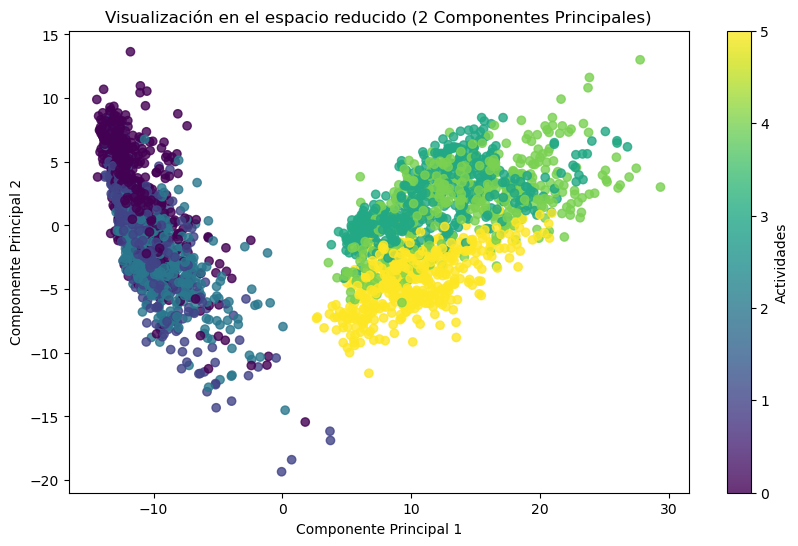

In [71]:
# Gráfico 2D del PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=label_encoder.transform(data_frame['Activity']), cmap='viridis', alpha=0.8)
plt.title('Visualización en el espacio reducido (2 Componentes Principales)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Actividades')
plt.show()


**Interpretación:**

Agrupamientos claros:

Las actividades tienden a formar grupos distintos en este espacio reducido. Por ejemplo, los puntos de color púrpura (una actividad específica) están separados de los puntos amarillos o verdes, lo que sugiere que PCA puede separar bien estas actividades.
Relación entre actividades:

Algunas actividades están más cercanas en el espacio, como los puntos verdes y amarillos, lo que podría indicar que estas actividades tienen características similares en los datos originales.
Reducción exitosa:

Aunque la información se comprimió de muchas dimensiones a dos, la separación entre grupos sugiere que los componentes principales capturaron bien las diferencias más importantes entre las actividades

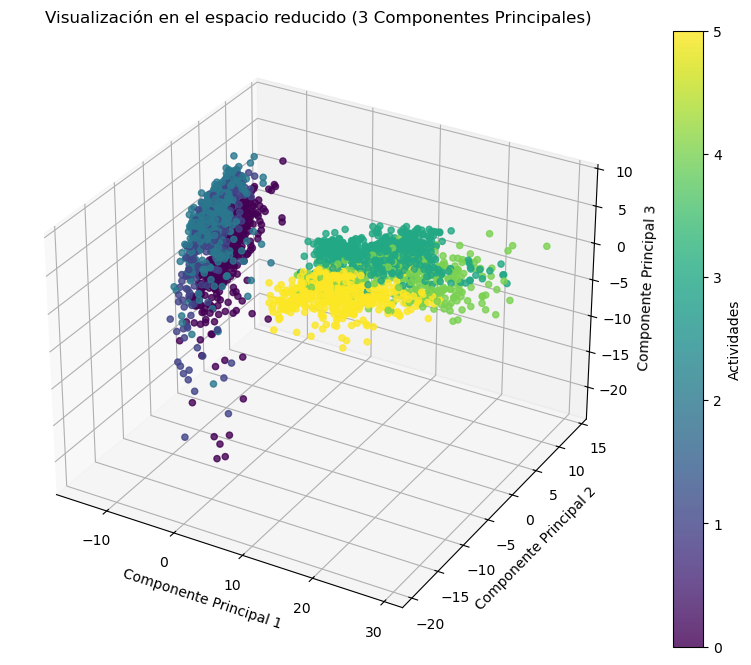

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Gráfico 3D del PCA
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],
                      c=label_encoder.transform(data_frame['Activity']), cmap='viridis', alpha=0.8)
ax.set_title('Visualización en el espacio reducido (3 Componentes Principales)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.colorbar(scatter, label='Actividades')
plt.show()


**Interpretación:**

Separación de las actividades:

Las actividades se agrupan en el espacio tridimensional según patrones similares en sus datos originales. Esto indica que el PCA logró preservar diferencias clave entre actividades.
Por ejemplo, las actividades representadas por colores púrpura y amarillo están bien separadas, lo que sugiere que son fáciles de distinguir.

Dimensiones adicionales:

A diferencia del gráfico 2D, esta representación con tres componentes principales permite observar una separación más clara en casos donde las actividades podían solaparse en el plano 2D. Esto agrega profundidad a la interpretación de los datos.

Utilidad del PCA:

El gráfico destaca que los tres componentes principales explican gran parte de la variabilidad en los datos. Esto facilita visualizar diferencias entre actividades sin usar todas las dimensiones originales.
En resumen, el gráfico evidencia que el PCA no solo simplifica los datos, sino que también resalta patrones importantes que ayudan a distinguir actividades físicas, lo cual es útil para análisis y modelos predictivos.